In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

### Functions

In [3]:
# global variables
autoencoder_path = '../autoencoder/results/'
clustergcn_path = '../cluster_gcn/results/'


def load_dat(architecture_name, dataset_name):
    global autoencoder_path, clustergcn_path
    
    # getting .dat file names
    path = '{}{}/'.format(autoencoder_path if architecture_name == 'autoencoder' else clustergcn_path,
                         dataset_name)
    file_names = [f for f in os.listdir(path) if f.endswith('.dat')]
    
    # getting data
    all_data = list()
    for file_name in file_names:
        file_path = '{}{}'.format(path, file_name)
        with open(file_path, 'r') as f:
            data = f.readlines()
            x = list()
            y = list()
            for line in data[1:]:
                current = line.split()
                x.append(float(current[2]))
                y.append(float(current[1]))
            all_data.append([x,y])
            
    return all_data


def process_data(data):
    data_processed = list()
    times = list()
    lengths = list()
    max_memory_usage = 0
    
    for i, d in enumerate(data):
        x, y = d
        times.append(x[-1] - x[0])
        lengths.append(len(x))
        data_processed.append(y)
        max_memory_usage = max(max_memory_usage, max(y))
        
    mean_time = np.mean(times)
    
    return mean_time, max_memory_usage, data_processed


def plot_data(y, title, savefig=False):
    x = [round(yi*0.1, 1) for yi in list(range(len(y)))]
    _, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_title('{}'.format(title.upper()), fontsize=16)
    ax.set_xlabel('tempo (em segundos)', fontsize=13)
    ax.set_ylabel('memória (em MiB)', fontsize=13)
    ax.plot(x,y)
    
    
def plot_events(data, title):
    _, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('tempo (em segundos)', fontsize=13)
    ax.set_ylabel('memória (em MiB)', fontsize=13)
    for i, y in enumerate(data):
        x = [round(yi*0.1, 1) for yi in list(range(len(y)))]
        ax.plot(x,y, label='evento {}'.format(i+1))
    ax.legend()
    
    
def plot_comp(ae_data, clustergcn_data, dataset_name, mean_times, max_memory_usages):
    xa = [round(xi*0.1, 1) for xi in list(range(len(ae_data)))]
    xc = [round(xi*0.1, 1) for xi in list(range(len(clustergcn_data)))]
    xamod = xc[:len(xa)]

    fig, axs = plt.subplots(1, 3, 
                            gridspec_kw={'width_ratios': [2, 0.5, 0.5]})
    fig.set_size_inches(13, 4)
    fig.suptitle(dataset_name.upper(), fontsize=16, )
    fig.tight_layout(rect=[0, 0.03, 1, 0.95], w_pad=8.0)
    
    # convergence
    axs[0].set_xlabel('tempo (em segundos)', fontsize=13)
    axs[0].set_ylabel('memória (em MiB)', fontsize=13)
    axs[0].plot(xamod, ae_data, label='autoencoder')
    axs[0].plot(xc, clustergcn_data, label='clustergcn')
    axs[0].legend()

    # constants
    labels = ['autoencoder', 'clustergcn']
    width = 0.20
    
    # mean time
    axs[1].set_ylabel('tempo médio (em segundos)')
    axs[1].bar(labels,
               mean_times,
               width,
               color=['C0', 'C1'])
    
    # max memory
    axs[2].set_ylabel('consumo máximo de memória (em MiB)')
    axs[2].bar(labels,
               max_memory_usages,
               width,
               color=['C0', 'C1'])
    
    
def percent_change(initial_value, final_value, round_factor=2):
    return round((final_value - initial_value) / initial_value * 100, round_factor)

### CORA

In [4]:
dataset_name = 'cora'

data = load_dat('autoencoder', dataset_name)
ae_mean_time, ae_max_memory_usage, ae_data = process_data(data)

data = load_dat('clustergcn', dataset_name)
clustergcn_mean_time, clustergcn_max_memory_usage, clustergcn_data = process_data(data)

In [5]:
# mean_times percent change
p_change = percent_change(clustergcn_mean_time, ae_mean_time)
ae_mean_time, clustergcn_mean_time, p_change

(6.403566598892212, 8.277066628138224, -22.63)

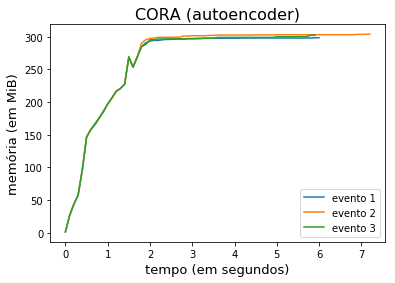

In [6]:
title = dataset_name.upper() + ' (autoencoder)'
plot_events(ae_data, title)  # mean == evento 1 == data[0]

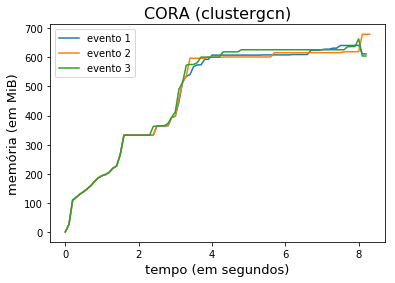

In [7]:
title = dataset_name.upper() + ' (clustergcn)'
plot_events(clustergcn_data, title)  # mean == evento 1 == data[0]

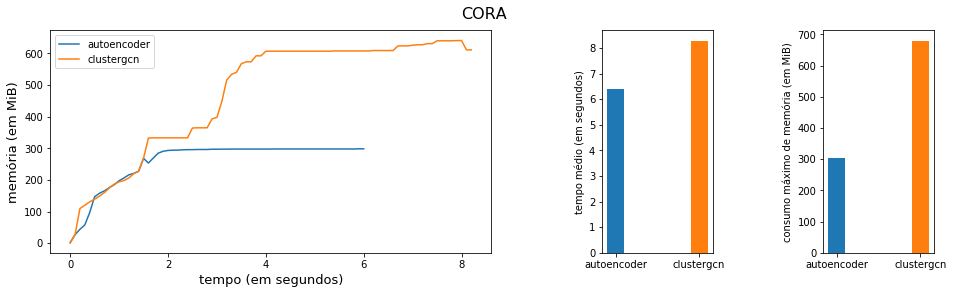

In [8]:
mean_times = [ae_mean_time, clustergcn_mean_time]
max_memory_usages = [ae_max_memory_usage, clustergcn_max_memory_usage]

plot_comp(ae_data[0], clustergcn_data[0], dataset_name, mean_times, max_memory_usages)

### PUBMED

In [9]:
dataset_name = 'pubmed'

data = load_dat('autoencoder', dataset_name)
ae_mean_time, ae_max_memory_usage, ae_data = process_data(data)

data = load_dat('clustergcn', dataset_name)
clustergcn_mean_time, clustergcn_max_memory_usage, clustergcn_data = process_data(data)

In [10]:
# mean_times percent change
p_change = percent_change(clustergcn_mean_time, ae_mean_time)
ae_mean_time, clustergcn_mean_time, p_change

(18.696266571680706, 35.14953327178955, -46.81)

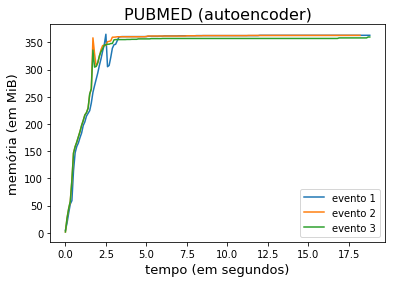

In [11]:
title = dataset_name.upper() + ' (autoencoder)'
plot_events(ae_data, title)  # mean == evento 2 == data[1]

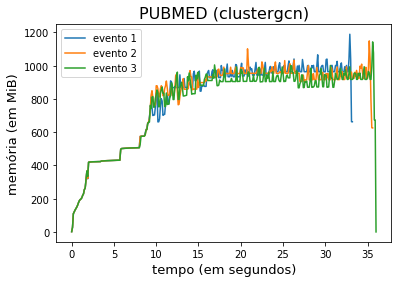

In [12]:
title = dataset_name.upper() + ' (clustergcn)'
plot_events(clustergcn_data, title)  # mean == evento 2 == data[1]

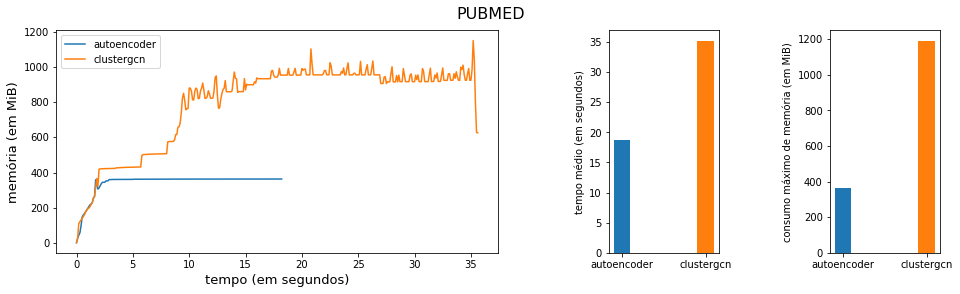

In [13]:
mean_times = [ae_mean_time, clustergcn_mean_time]
max_memory_usages = [ae_max_memory_usage, clustergcn_max_memory_usage]

plot_comp(ae_data[1], clustergcn_data[1], dataset_name, mean_times, max_memory_usages)

### REDDIT

In [14]:
dataset_name = 'reddit'

data = load_dat('autoencoder', dataset_name)
ae_mean_time, ae_max_memory_usage, ae_data = process_data(data)

data = load_dat('clustergcn', dataset_name)
clustergcn_mean_time, clustergcn_max_memory_usage, clustergcn_data = process_data(data)

In [15]:
# mean_times percent change
p_change = percent_change(clustergcn_mean_time, ae_mean_time)
ae_mean_time, clustergcn_mean_time, p_change

(279.6756332715352, 705.443133354187, -60.35)

In [16]:
# memory_usage percent change
p_change = percent_change(clustergcn_max_memory_usage, ae_max_memory_usage)
ae_max_memory_usage, clustergcn_max_memory_usage, p_change

(9147.375, 11935.234375, -23.36)

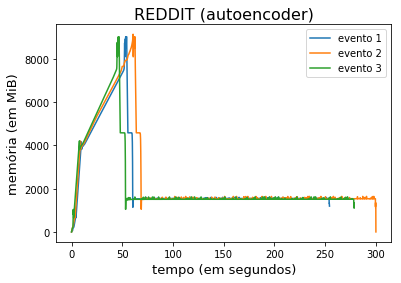

In [17]:
title = dataset_name.upper() + ' (autoencoder)'
plot_events(ae_data, title)  # mean == evento 1 == data[0]

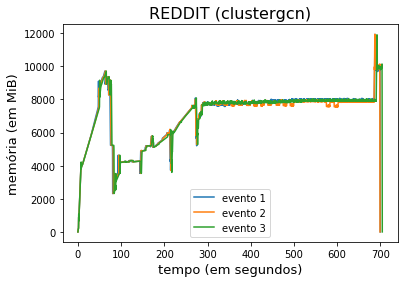

In [18]:
title = dataset_name.upper() + ' (clustergcn)'
plot_events(clustergcn_data, title)  # mean == evento 1 == data[0]

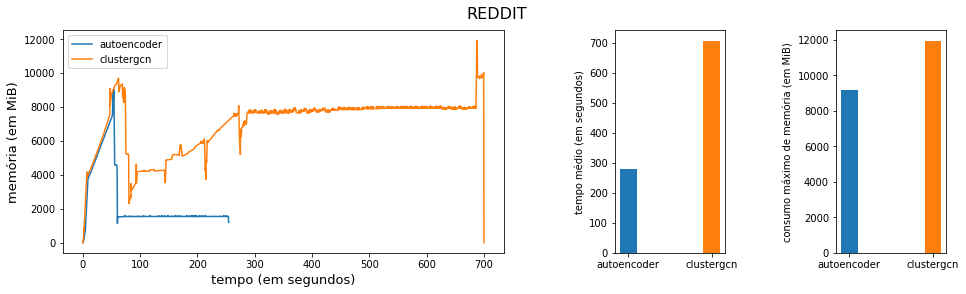

In [19]:
mean_times = [ae_mean_time, clustergcn_mean_time]
max_memory_usages = [ae_max_memory_usage, clustergcn_max_memory_usage]

plot_comp(ae_data[0], clustergcn_data[0], dataset_name, mean_times, max_memory_usages)